In [ ]:
import tensorflow as tf
from tensorflow import keras as kr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import glob
import csv

In [ ]:
f= open('casos_positivos.csv')
reader = csv.reader(f)

In [ ]:
f

<_io.TextIOWrapper name='casos_positivos.csv' mode='r' encoding='cp1252'>

In [ ]:
df = pd.read_csv('casos_positivos.csv')

In [ ]:
df

,fecha_toma_muestra,pruebas_totales,positivos_totales,pruebas_totales_cdmx,positivos_totales_cdmx,tasa_positividad,tasa_positividad_cdmx
0,2020-03-05,69,1,52,1,0.014493,0.019231
1,2020-03-13,57,2,46,1,0.035088,0.021739
2,2020-03-19,67,3,67,3,0.044776,0.044776
3,2020-03-24,66,1,60,1,0.015152,0.016667
4,2020-03-26,54,1,50,1,0.018519,0.020000
...,...,...,...,...,...,...,...
648,2021-12-30,11419,2770,10470,2573,0.242578,0.245750
649,2021-12-31,7989,2288,7236,2101,0.286394,0.290354
650,2022-01-01,1304,343,1195,330,0.263037,0.276151
651,2022-01-02,1957,481,1769,441,0.245784,0.249293


In [ ]:
df[['positivos_totales_cdmx']]

,positivos_totales_cdmx
0,1
1,1
2,3
3,1
4,1
...,...
648,2573
649,2101
650,330
651,441


In [ ]:
a = np.array(df[['positivos_totales_cdmx']])
casos_d190 = np.array(df[['positivos_totales_cdmx']][190:])
# Tomaremos los casos de la tercera ola para ajustar a un modelo de ISR

c_3o = np.array(df[['positivos_totales_cdmx']][420:630]) # Los datos de la tercera ola
c_30_t = np.linspace(0, len(c_3o), len(c_3o))

In [ ]:
print('La cantidad de postivos totales son:', sum(a), 'personas infectadas')

La cantidad de postivos totales son: [807977] personas infectadas


In [ ]:
a_t = np.linspace(0, len(a), len(a))

a_T = a

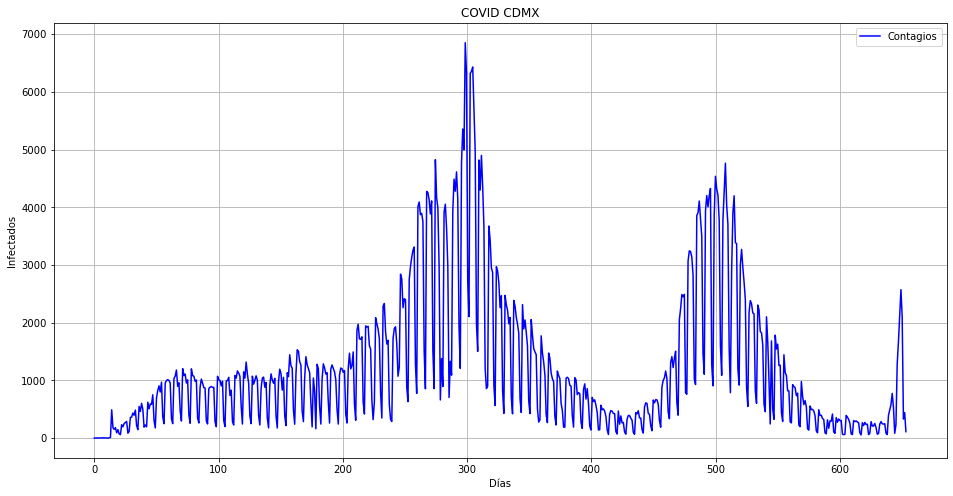

In [ ]:
plt.rcParams["figure.figsize"] = (16, 8)
plt.xlabel("Días")
plt.ylabel("Infectados")
plt.plot(a_t,a, c = 'b', linewidth = 1.5, linestyle = '-', label ='Contagios')
plt.legend(loc='upper right')
plt.title("COVID CDMX")
plt.grid()

plt.show()

In [ ]:
len(a_T)

653

In [ ]:
lis_InfT = []
for i in range(len(a_T)):
    if i < 646:
        x = (a_T[6+i]+a_T[5+i]+a_T[4+i]+a_T[3+i]+a_T[2+i]+a_T[1+i]+ a_T[i])/7
        lis_InfT.append(x)


In [ ]:
len(lis_InfT)

646

In [ ]:
lis_InfT_x = np.linspace(0, len(lis_InfT), len(lis_InfT))

# Creando el promedio a 7 días para ver la gráfica "suave"

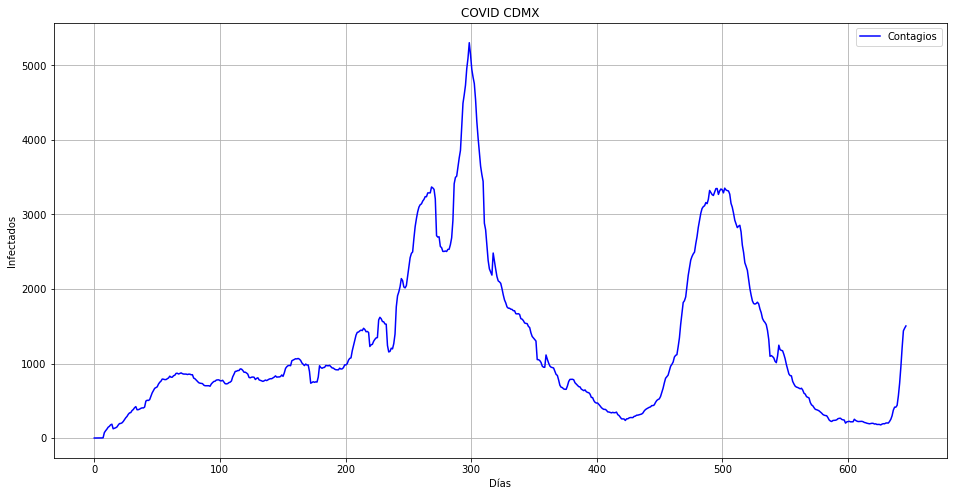

In [ ]:
plt.rcParams["figure.figsize"] = (16, 8)
plt.xlabel("Días")
plt.ylabel("Infectados")
plt.plot(lis_InfT_x, lis_InfT, c = 'b', linewidth = 1.5, linestyle = '-', label ='Contagios')
plt.legend(loc='upper right')
plt.title("COVID CDMX")
plt.grid()

plt.show()

# Juntas

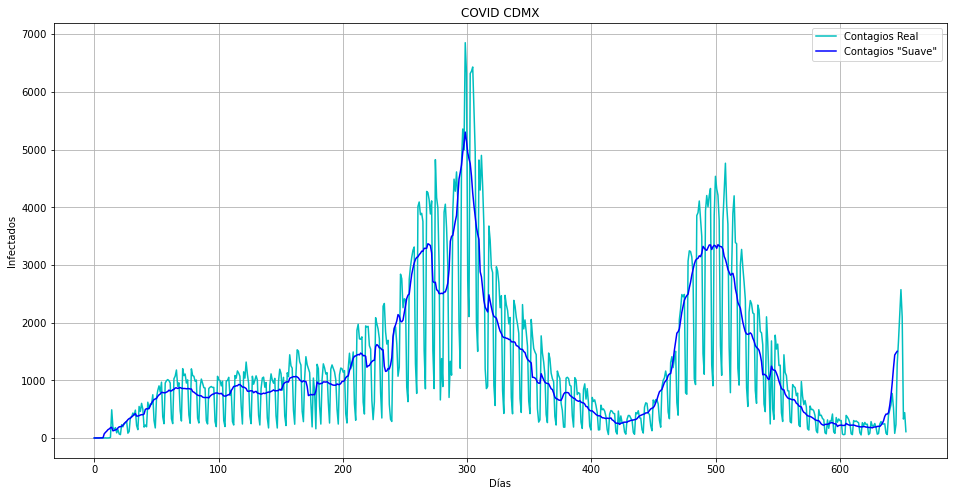

In [ ]:
plt.rcParams["figure.figsize"] = (16, 8)
plt.xlabel("Días")
plt.ylabel("Infectados")
plt.plot(a_t,a, c = 'c', linewidth = 1.5, linestyle = '-', label ='Contagios Real')
plt.plot(lis_InfT_x, lis_InfT, c = 'b', linewidth = 1.5, linestyle = '-', label ='Contagios "Suave"')
plt.legend(loc='upper right')
plt.title("COVID CDMX")
plt.grid()

plt.show()

## Tomamos sólo para la ola más estable, es decir para los datos correspondientes del 26 de mayo del 2021 al 11 de diciembre del 2021

In [ ]:
# Para saber las fechas
to_f = df[['fecha_toma_muestra']][420:630]

In [ ]:
to_f

,fecha_toma_muestra
420,2021-05-16
421,2021-05-17
422,2021-05-18
423,2021-05-19
424,2021-05-20
...,...
625,2021-12-07
626,2021-12-08
627,2021-12-09
628,2021-12-10


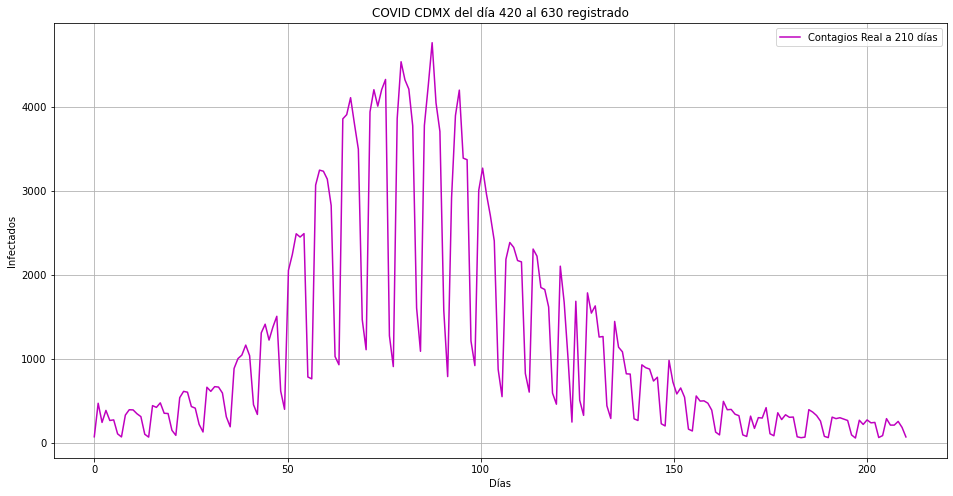

In [ ]:
plt.rcParams["figure.figsize"] = (16, 8)
plt.xlabel("Días")
plt.ylabel("Infectados")
plt.plot(c_30_t,c_3o, c = 'm', linewidth = 1.5, linestyle = '-', label ='Contagios Real a 210 días')
plt.legend(loc='upper right')
plt.title("COVID CDMX del día 420 al 630 registrado")
plt.grid()
plt.show()

# Utilizamos el algoritmo para "normalizar" los datos en su promedio cada 7 días.

In [ ]:
len(c_3o)

210

In [ ]:
l_2 = []

for i in range(len(c_3o)):
    if i < 193:
        x = (c_3o[6+i]+c_3o[5+i]+c_3o[4+i]+c_3o[3+i]+c_3o[2+i]+c_3o[1+i]+ c_3o[i])/7
        l_2.append(x)
c_30_n = np.array(l_2)
c_30_nt = np.linspace(0, len(c_30_n), len(c_30_n))

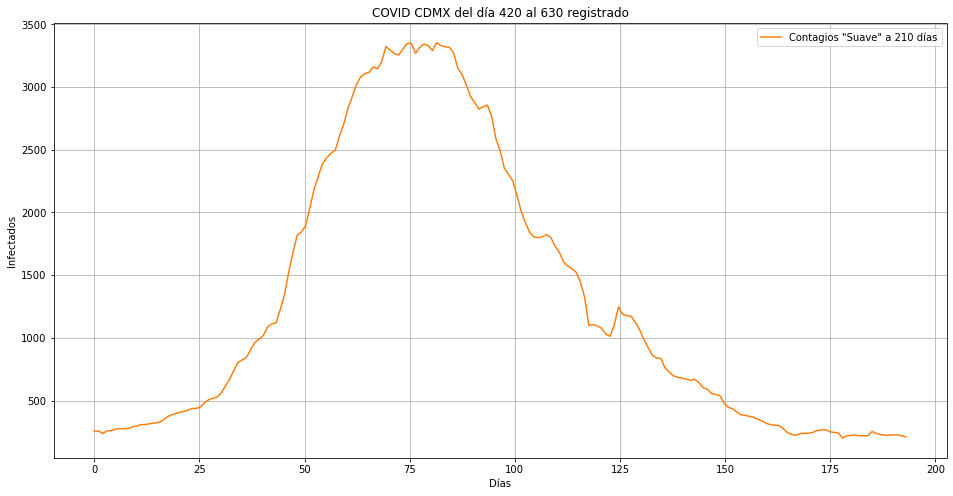

In [ ]:
plt.rcParams["figure.figsize"] = (16, 8)
plt.xlabel("Días")
plt.ylabel("Infectados")
plt.plot(c_30_nt, c_30_n, c = 'tab:orange', linewidth = 1.5, linestyle = '-', label ='Contagios "Suave" a 210 días')
plt.legend(loc='upper right')
plt.title("COVID CDMX del día 420 al 630 registrado")
plt.grid()
plt.show()

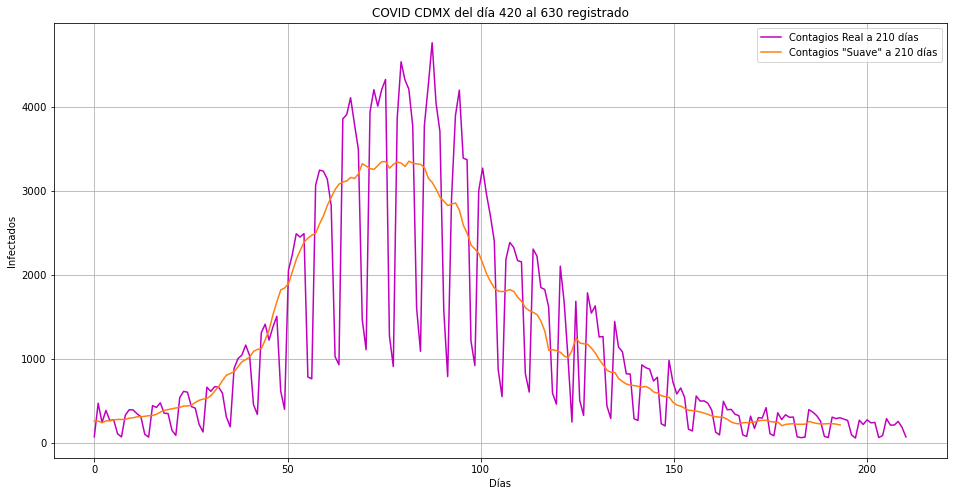

In [ ]:
plt.rcParams["figure.figsize"] = (16, 8)
plt.xlabel("Días")
plt.ylabel("Infectados")
plt.plot(c_30_t,c_3o, c = 'm', linewidth = 1.5, linestyle = '-', label ='Contagios Real a 210 días')
plt.plot(c_30_nt, c_30_n, c = 'tab:orange', linewidth = 1.5, linestyle = '-', label ='Contagios "Suave" a 210 días')
plt.legend(loc='upper right')
plt.title("COVID CDMX del día 420 al 630 registrado")
plt.grid()
plt.show()

# Normalizamos del número total de infectados para compararlo con el modelo ISR

In [ ]:
con_ISR = c_30_n
print('El número de datos son:', len(con_ISR))

El número de datos son: 193


In [ ]:
sum(con_ISR)

array([247552.42857143])

In [ ]:
con_N_ISR = (con_ISR/sum(con_ISR))

In [ ]:
sum(con_N_ISR)

array([1.])

# Volviendo a gráficar con los datos normalizados del total de infectados

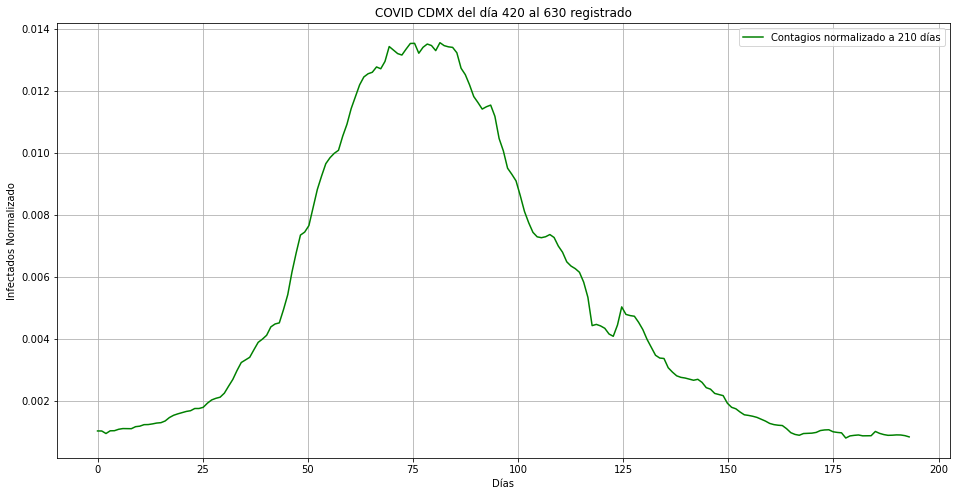

In [ ]:
plt.rcParams["figure.figsize"] = (16, 8)
plt.xlabel("Días")
plt.ylabel("Infectados Normalizado")
plt.plot(c_30_nt, con_N_ISR, c = 'green', linewidth = 1.5, linestyle = '-', label ='Contagios normalizado a 210 días')
plt.legend(loc='upper right')
plt.title("COVID CDMX del día 420 al 630 registrado")
plt.grid()
plt.show()

# Introduciendo el modelo ISR

In [ ]:
### Metodo de Euler $n$ Dimensiones

def EulerND(f,x0,t0,tf,dt):
    
    T=[]
    X=[]

    for i in range(len(x0)):
        a = []
        X.append(a)
        X[i].append(x0[i])

    T.append(t0)

    t=t0
    x=x0

    while (t<tf):
        x = x + f(x)*dt
        t = t + dt
        for i in range(len(x0)):
            X[i].append(x[i])
        T.append(t)

    return X,T









### Metodo de Euler $n$ Dimensiones con opción de agregar parametros


def EulerND(f,x0,t0,tf,dt,params):
        
    T=[]
    X=[]

    for i in range(len(x0)):
        a = []
        X.append(a)
        X[i].append(x0[i])

    T.append(t0)

    t=t0
    x=x0

    while (t<tf):
        x = x + f(x,params)*dt
        t = t + dt
        for i in range(len(x0)):
            X[i].append(x[i])
        T.append(t)

    return X,T





## Campo de Pendientes

#Campo Vectorial    
def CampoPend2(f,xmin,xmax,ymin,ymax,params,escala,pasoX,pasoY):  
    
    for i in np.arange(xmin,xmax, paso):
        for j in np.arange(ymin,ymax, paso):
            v = np.array([i,j])
            y = f(v,params)
            
            plt.quiver(i, j, y[0], y[1] , width=0.001, scale=escala)

    plt.axhline(0, color='black')
    plt.axvline(0, color='black')    
    
    
############ Version Normalizada, para una mejor visulacizacion (campo de direcciones) #################     

def CampoPendNorm2(f,xmin,xmax,ymin,ymax,params,pasoX,pasoY):    
    
    for i in np.arange(xmin,xmax, pasoX):
        for j in np.arange(ymin,ymax, pasoY):
            v = np.array([i,j])
            y = f(v,params)
            
            N = np.sqrt(y[0]**2+y[1]**2)  #aqui se calcula la norma del vector
            
            if (N != 0): # y se normaliza si el vector es diferente del vector 0
                U, V = float(y[0])/float(N), float(y[1])/float(N)
            else:
                U, V = y[0],y[1]

            plt.quiver(i, j, U, V , width=0.001, scale=50)

    plt.axhline(0, color='black')
    plt.axvline(0, color='black')    
       

## Ejemplo: Modelo SIR (Succeptible, Infected, Removed).

## $\dot{S} = - \beta SI$ 
## $\dot{I} =  \beta SI - \gamma I $
## $\dot{R} =  \gamma I $

### $\;$


### Si $S_0 >  \dfrac{\gamma}{\beta}$


### $R_0 = \color{blue}{S_0 \beta} \color{red}{\dfrac{1}{\gamma}}$



In [ ]:
def SIR(x,params):  # x es un vector en 3D  (S,I,R)
    
    beta = params[0]
    gama = params[1]
    
    
    y = np.array(np.zeros(3))
    
    y[0] = -beta*x[0]*x[1]
    y[1] = beta*x[0]*x[1] - gama*x[1] 
    y[2] = gama*x[1]   

    return y

R0 = 8.144566666666666
% total de Infectados (al termino de la epidemia) = 93.48 % de la población total


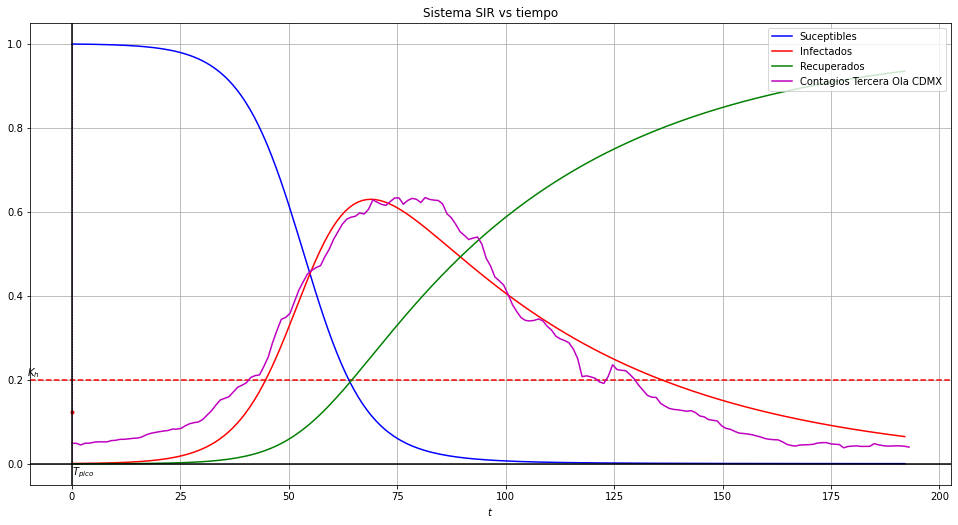

In [ ]:
from ipywidgets import *

fig, ax = plt.subplots(figsize=(16.5, 8.5))
ax.grid(True)


N = 1500
Kh = 0.20

# @widgets.interact( beta=(0.1, 5, 0.1), gama=(0.01, 1, 0.01))
#@widgets.interact( beta=(0.1, 5, 0.01), diasInf=(1, 60, 1))


# def update(beta=1.428, gama=0.1428):
# def update(beta=0.1, diasInf=14):
#def update(beta=0.1, diasInf=10):
    
 #   for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
  #      artist.remove()
   # ax.clear()
   # ax.grid(True)
    

beta = 0.163
diasInf = 50
    # Titulos de la grafica

plt.title("Sistema SIR vs tiempo")
plt.xlabel("$t$")
#     plt.ylabel("$N_2$")    

vac = 0
gama = float(1)/float(diasInf)    


i=1
s=(N-i)-vac
r=0

I0=float(i)/float(N)
S0=float(s)/float(N)
R0=float(r)/float(N)

#     plt.axhline(Kh,color='red', ls='--', lw=1.0)
plt.axhline(Kh,color='red', ls='--')
ax.text(-10.5,Kh+0.01,'$K_h$')


params = np.array([beta,gama])

x0 = np.array([S0,I0,R0])

Y,T = EulerND(SIR,x0,0,192,1,params)
#     Y,T = EulerND(SIR,x0,0,120,0.001,params)

S = Y[0]
I = Y[1]
R = Y[2]

plt.plot(T,S,'b', label = 'Suceptibles')
plt.plot(T,I,'r', label = 'Infectados')
plt.plot(T,R,'g', label = 'Recuperados')
plt.plot(c_30_nt, (con_N_ISR)*sum(I), c = 'm', linewidth = 1.5, linestyle = '-', label ='Contagios Tercera Ola CDMX')

plt.legend(loc='upper right')

r0 = S0*beta*(float(1)/float(gama))
sus = (float(gama)/float(beta))
# plt.axhline(r0,color='y')

xp = 0
for x in range(len(S)):
    if (round(S[x],4)==round(sus,4)):
        xp = x
#     print(T[xp])

plt.plot(T[xp],sus,'r.')

#     plt.vlines(x=T[xp], ymin=0, ymax=1, colors='violet', ls='--', lw=1.0, alpha=0.75)
plt.vlines(x=T[xp], ymin=0, ymax=1, colors='purple', ls=':', lw=1.0)    
ax.text(T[xp],-0.025,'$T_{pico}$')

R00 = (float(gama)/float(beta))
#     plt.axhline(R00,color='orange', linestyle='--')
#plt.axhline(R00,color='orange', linestyle='--',lw=1.0)

#ax.text(-11.5,R00+0.01,'$\dfrac{\\gamma}{\\beta} = \dfrac{S_0}{R_0}$')

R000 = (float(beta)/float(gama))
#     print('R000 =',R000)

print('R0 =',r0)
#     print('gama/beta =',sus)
#     print('% de vac nec =',(1-sus)*100)


#     print('% total de Infectados (al termino de la epidemia) =',R[len(R)-1]*100)
print('% total de Infectados (al termino de la epidemia) =',round(R[len(R)-1]*100,2),'% de la población total')




###############################################


# Ejes y limites de la grafica
plt.axhline(0, color='black')
plt.axvline(0, color='black')   
plt.show()
#     plt.xlim(-1, Xmax+1)
#     plt.ylim(-1, Ymax+1) 



In [ ]:
import time, enum, math
import numpy as np
import pandas as pd
import pylab as plt
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import NetworkGrid
from mesa.datacollection import DataCollector

import networkx as nx

from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, GeoJSONDataSource, ColorBar, HoverTool, Legend, LinearColorMapper, ColorBar
from bokeh.plotting import figure
from bokeh.palettes import brewer
from bokeh.models.glyphs import Line
from bokeh.palettes import Category10, Viridis

In [ ]:
class State(enum.IntEnum):
    SUSCEPTIBLE = 0
    INFECTED = 1
    REMOVED = 2

In [ ]:
class MyAgent(Agent):
    """ An agent in an epidemic model."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.age = int(self.random.normalvariate(20,40))
        self.state = State.SUSCEPTIBLE  
        self.infection_time = 0

    def move(self):
        """Move the agent"""

        possible_steps = [
            node
            for node in self.model.grid.get_neighbors(self.pos, include_center=False)
            if self.model.grid.is_cell_empty(node)
        ]
        if len(possible_steps) > 0:
            new_position = self.random.choice(possible_steps)                 
            self.model.grid.move_agent(self, new_position)

    def status(self):
        """Check infection status"""
        
        if self.state == State.INFECTED:     
            drate = self.model.death_rate
            alive = np.random.choice([0,1], p=[drate,1-drate])
            if alive == 0:
                self.model.schedule.remove(self)            
            t = self.model.schedule.time-self.infection_time
            if t >= self.recovery_time:          
                self.state = State.REMOVED
            #print (self.model.schedule.time,self.recovery_time,t)

    def contact(self):
        """Find close contacts and infect"""
        
        neighbors_nodes = self.model.grid.get_neighbors(self.pos, include_center=False)
        susceptible_neighbors = [
            agent
            for agent in self.model.grid.get_cell_list_contents(neighbors_nodes)
            if agent.state is State.SUSCEPTIBLE
        ]
        for a in susceptible_neighbors:
            if self.random.random() < model.ptrans:
                a.state = State.INFECTED
                a.recovery_time = model.get_recovery_time()
                                
    def step(self):
        self.status()
        self.move()
        self.contact()
        
    def toJSON(self):        
        d = self.unique_id
        return json.dumps(d, default=lambda o: o.__dict__, 
            sort_keys=True, indent=4)

In [ ]:
class NetworkInfectionModel(Model):
    """A model for infection spread."""
    
    def __init__(self, N=10, ptrans=0.5, avg_node_degree=3,
                 progression_period=3, progression_sd=2, death_rate=0.0193, recovery_days=21,
                 recovery_sd=7):
        
        #self.num_agents = N
        self.num_nodes = N  
        prob = avg_node_degree / self.num_nodes
        
        self.initial_outbreak_size = 1
        self.recovery_days = recovery_days
        self.recovery_sd = recovery_sd
        self.ptrans = ptrans
        self.death_rate = death_rate
        
        self.G = nx.erdos_renyi_graph(n=self.num_nodes, p=prob)
        self.grid = NetworkGrid(self.G)
        
        self.schedule = RandomActivation(self)
        self.running = True
        #self.dead_agents = []
        
        # Create agents
        for i, node in enumerate(self.G.nodes()):
            a = MyAgent(i+1, self)
            self.schedule.add(a)
            #add agent
            self.grid.place_agent(a, node)

            #make some agents infected at start
            infected = np.random.choice([0,1], p=[0.99,0.01])
            if infected == 1:
                a.state = State.INFECTED
                a.recovery_time = self.get_recovery_time()
            
        self.datacollector = DataCollector(
            agent_reporters={"State": "state"})

    def get_recovery_time(self):
        return int(self.random.normalvariate(self.recovery_days,self.recovery_sd))
    
    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

In [ ]:
model = NetworkInfectionModel(300, ptrans=0.2)
model.step()
model

In [ ]:
def get_column_data(model):
    #pivot the model dataframe to get states count at each step
    agent_state = model.datacollector.get_agent_vars_dataframe()
    X = pd.pivot_table(agent_state.reset_index(),index='Step',columns='State',aggfunc=np.size,fill_value=0)    
    labels = ['Susceptible','Infected','Removed']
    X.columns = labels[:len(X.columns)]
    return X
    
def plot_states(model,ax):    
    steps = model.schedule.steps
    X = get_column_data(model)
    X.plot(ax=ax,lw=3,alpha=0.8)
    return f

In [ ]:
pop=240
steps=30
st=time.time()
model = NetworkInfectionModel(pop, ptrans=0.05)
for i in range(steps):
    model.step()
print (time.time()-st)
agent_state = model.datacollector.get_agent_vars_dataframe()
print (get_column_data(model)[:10])

0.269669771194458
      Susceptible  Infected  Removed
Step                                
0             239         1        0
1             198        42        0
2             169        68        1
3             145        92        1
4             133       102        1
5             116       118        1
6             101       131        1
7              92       133        4
8              82       136        4
9              74       143        5


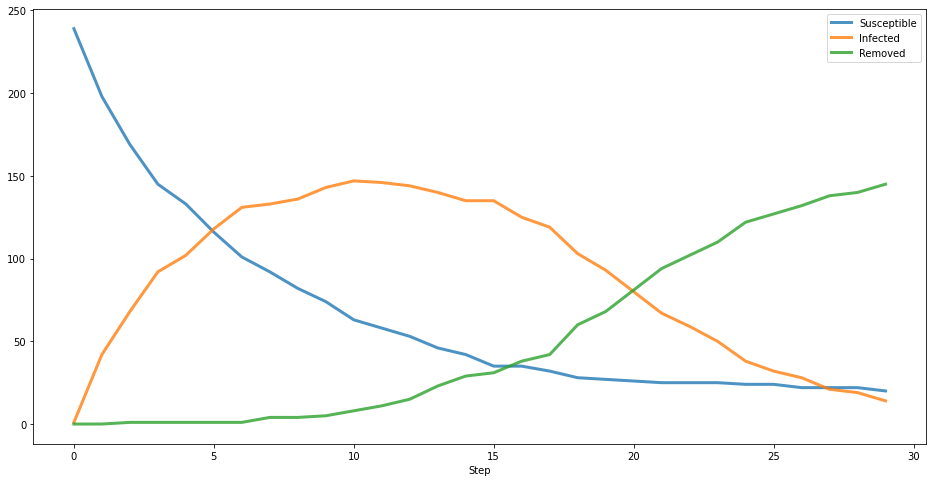

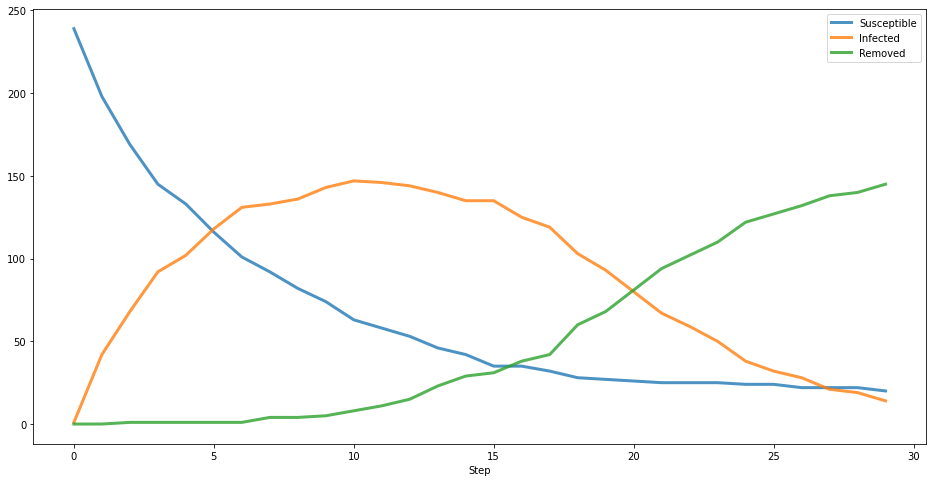

In [ ]:
f,ax=plt.subplots(1,1,figsize=(16,8))
plot_states(model,ax)

#plt.savefig('SIR.png',dpi=150)

(-1.095343873423605,
 1.002221341895703,
 -0.9066388919812802,
 0.8712501381772764)

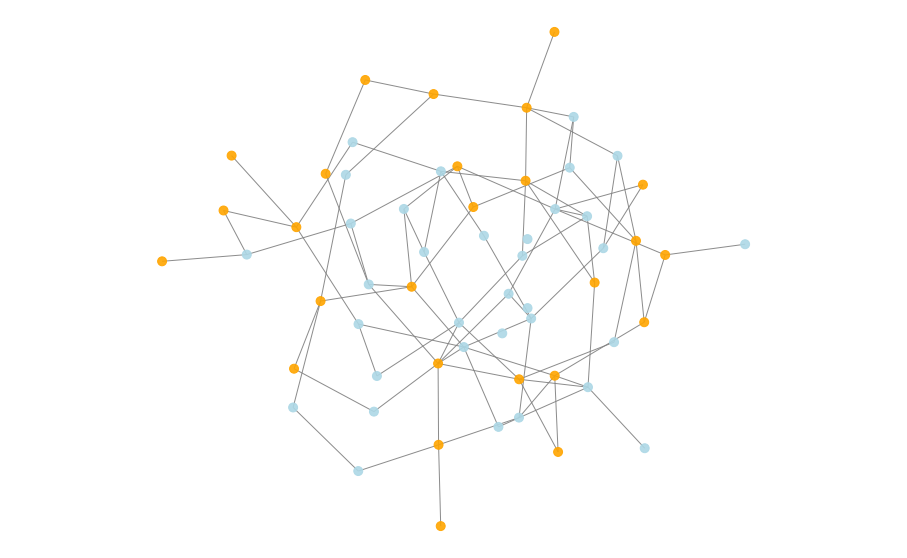

In [ ]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
cmap = ListedColormap(["lightblue", "orange", "green",])

def plot_grid(model,fig,layout='spring',title=''):
    graph = model.G
    if layout == 'kamada-kawai':      
        pos = nx.kamada_kawai_layout(graph)  
    elif layout == 'circular':
        pos = nx.circular_layout(graph)
    else:
        pos = nx.spring_layout(graph, iterations=5, seed=8)  
    plt.clf()
    ax=fig.add_subplot()
    states = [int(i.state) for i in model.grid.get_all_cell_contents()]

    #cells = [(i.pos,int(i.state)) for i in model.grid.get_all_cell_contents()]
    #print (cells[:10])
    #print (pos)
    #print (pd.Series(states).value_counts())
    colors = [cmap(i) for i in states]
    
    nx.draw(graph, pos, node_size=80, edge_color='gray', node_color=colors, #with_labels=True,
            alpha=0.9,font_size=14,ax=ax)
    #print (ax.patches)
    #ax.legend(['S','I','R'])
    ax.set_title(title)
    return

fig,ax=plt.subplots(1,1,figsize=(16,10))
model = NetworkInfectionModel(60, ptrans=0.1)
model.step();model.step()
f=plot_grid(model,fig,layout='kamada-kawai')
#plt.savefig('abm_networkgrid.jpg')
plt.axis('equal')